In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
train.shape

(7613, 5)

In [4]:
train.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import re
STOPWORDS = stopwords.words('english')
STOPWORDS.append("rt") #implying retweets
train.text=train.text.astype(str)
train.keyword=train.keyword.astype(str)
def clean_text(train):
    train["text"] = train["text"].apply(lambda x: x.lower())
    train["text"] = [re.sub('#', '', tweet) for tweet in train["text"]]
    train["text"] = [re.sub('(@[^\s]+)|(#[^\s]+)', '', tweet) for tweet in train["text"]]
    train["text"] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet) for tweet in train["text"]]
    train["text"] = train["text"].str.split(' ').apply(lambda tweet: ' '.join(k for k in tweet if k not in STOPWORDS))
    train["text"] = train["text"].str.replace(' +', ' ', case=False)
    train["text"] = train["text"].str.strip()
    train["text"].replace('', np.nan, inplace=True)
    train.dropna(subset=["text"], inplace=True)
clean_text(train)

C:\Users\hp\AppData\Local\Temp\ipykernel_1388\2446371197.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  train["text"] = train["text"].str.replace(' +', ' ', case=False)


In [7]:
train.head


<bound method NDFrame.head of          id keyword location  \
0         1     nan      NaN   
1         4     nan      NaN   
2         5     nan      NaN   
3         6     nan      NaN   
4         7     nan      NaN   
...     ...     ...      ...   
7608  10869     nan      NaN   
7609  10870     nan      NaN   
7610  10871     nan      NaN   
7611  10872     nan      NaN   
7612  10873     nan      NaN   

                                                   text  target  
0          deeds reason earthquake may allah forgive us       1  
1                forest fire near la ronge sask. canada       1  
2     residents asked 'shelter place' notified offic...       1  
3     13,000 people receive wildfires evacuation ord...       1  
4     got sent photo ruby alaska smoke wildfires pou...       1  
...                                                 ...     ...  
7608  two giant cranes holding bridge collapse nearb...       1  
7609  control wild fires california even northern pa...  

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
nltk.download('omw-1.4')
def stemSentence(sentence):
    lemmatizer = WordNetLemmatizer()
    stemmer = LancasterStemmer()
    words=word_tokenize(sentence)
    stem_sentence=[]
    for word in words:
        stem_sentence.append(lemmatizer.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


train.text.astype(str).apply(stemSentence)
train.head

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<bound method NDFrame.head of          id keyword location  \
0         1     nan      NaN   
1         4     nan      NaN   
2         5     nan      NaN   
3         6     nan      NaN   
4         7     nan      NaN   
...     ...     ...      ...   
7608  10869     nan      NaN   
7609  10870     nan      NaN   
7610  10871     nan      NaN   
7611  10872     nan      NaN   
7612  10873     nan      NaN   

                                                   text  target  
0          deeds reason earthquake may allah forgive us       1  
1                forest fire near la ronge sask. canada       1  
2     residents asked 'shelter place' notified offic...       1  
3     13,000 people receive wildfires evacuation ord...       1  
4     got sent photo ruby alaska smoke wildfires pou...       1  
...                                                 ...     ...  
7608  two giant cranes holding bridge collapse nearb...       1  
7609  control wild fires california even northern pa...  

In [10]:
from sklearn.model_selection import train_test_split
X = train["text"]
y = train["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print ('Total   tweet count:', len(train))
print ('disater  tweet count:', len(train[train.target == 1]))
print ('normal tweet count:', len(train[train.target == 0]), '\n')
print ('Total tweet count in training sampple:', len(X_train))
print ('Total tweet count in test sample:    ', len(X_test))
print ('disater  tweet count in X_train:', X_train[y_train == 1].count())
print ('normal tweet count in X_train:', X_train[y_train == 0].count())
print ('disater  tweet count in X_test: ', X_test[y_test == 1].count())
print ('normal tweet count in X_test: ', X_test[y_test == 0].count())

Total   tweet count: 7612
disater  tweet count: 3271
normal tweet count: 4341 

Total tweet count in training sampple: 5328
Total tweet count in test sample:     2284
disater  tweet count in X_train: 2300
normal tweet count in X_train: 3028
disater  tweet count in X_test:  971
normal tweet count in X_test:  1313


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
tfidftrans = TfidfVectorizer()
X_train = tfidftrans.fit_transform(X_train)
print(X_train.shape)
X_test = tfidftrans.transform(X_test)
print(X_test.shape)

(5328, 12068)
(2284, 12068)


In [12]:
def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)
def predict(clf,X_test):
    return clf.predict(X_test)
dict={}

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha =0.2)
training(mnb,X_train,y_train)
pred = predict(mnb,X_test)
print(accuracy_score(y_test,pred,normalize=True))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
dict[mnb]=accuracy_score(y_test,pred,normalize=True)

0.8007880910683012
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1313
           1       0.80      0.70      0.75       971

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

[[1145  168]
 [ 287  684]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    training(knn,X_train,y_train)
    pred = predict(knn,X_test)
    print('k = ',i)
    print(accuracy_score(y_test,pred,normalize=True))
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test,pred))
    dict[knn,i]=accuracy_score(y_test,pred,normalize=True)

k =  1
0.5166374781085814
              precision    recall  f1-score   support

           0       0.80      0.21      0.34      1313
           1       0.47      0.93      0.62       971

    accuracy                           0.52      2284
   macro avg       0.63      0.57      0.48      2284
weighted avg       0.66      0.52      0.46      2284

[[ 281 1032]
 [  72  899]]
k =  2
0.7316112084063048
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1313
           1       0.70      0.64      0.67       971

    accuracy                           0.73      2284
   macro avg       0.73      0.72      0.72      2284
weighted avg       0.73      0.73      0.73      2284

[[1045  268]
 [ 345  626]]
k =  3
0.7044658493870403
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1313
           1       0.62      0.78      0.69       971

    accuracy                           0.70      2

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
training(dt,X_train,y_train)
pred = predict(dt,X_test)
print(accuracy_score(y_test,pred,normalize=True))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
dict[dt]=accuracy_score(y_test,pred,normalize=True)

0.7162872154115587
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1313
           1       0.65      0.73      0.69       971

    accuracy                           0.72      2284
   macro avg       0.71      0.72      0.71      2284
weighted avg       0.72      0.72      0.72      2284

[[926 387]
 [261 710]]


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
training(lr,X_train,y_train)
pred = predict(lr,X_test)
print(accuracy_score(y_test,pred,normalize=True))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
dict[lr]=accuracy_score(y_test,pred,normalize=True)

0.8099824868651488
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1313
           1       0.84      0.68      0.75       971

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.81      0.81      0.81      2284

[[1189  124]
 [ 310  661]]


In [17]:
n=max(dict.values())
print(n)
for name,predicted in dict.items():
    if predicted==n:
        print(name)
        model=name

0.8099824868651488
LogisticRegression(max_iter=10000)


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)


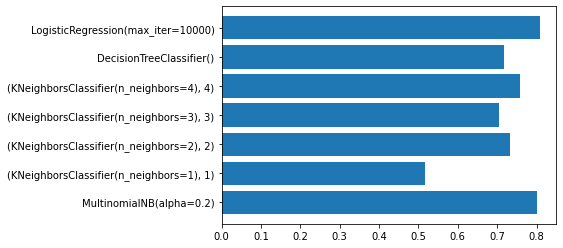

In [18]:
import matplotlib.pyplot as plt
names = list(dict.keys())
values = list(dict.values())
plt.barh(range(len(dict)), values, tick_label=names)
plt.show()

In [19]:
test= pd.read_csv('test.csv')

In [20]:
clean_text(test)
test.text.astype(str).apply(stemSentence)
pred_text=test["text"]
pred_text=tfidftrans.transform(pred_text)


C:\Users\hp\AppData\Local\Temp\ipykernel_1388\2446371197.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  train["text"] = train["text"].str.replace(' +', ' ', case=False)


In [21]:
pred=lr.predict(pred_text)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
submission= pd.read_csv('sample_submission.csv')
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [28]:
submission["id"]=test["id"]

In [29]:
submission["target"]=pred

In [30]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [31]:
submission.to_csv("submission.csv",index=False)